In [22]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# loading the datasets
data=pd.read_csv('Student_Performance.csv')
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [26]:
# shape of the data
data.shape

(10000, 6)

In [28]:
# data types
data.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [30]:
# checking for null values
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

### Checking for outliers

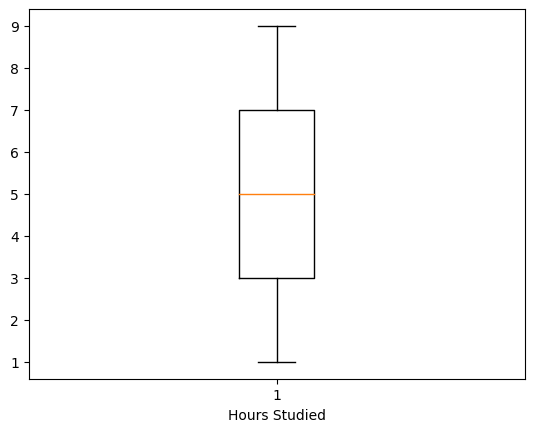

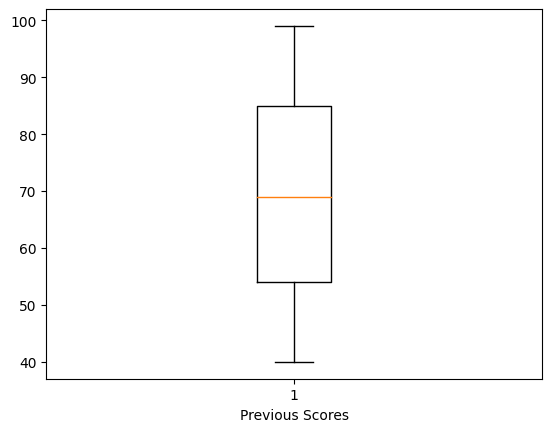

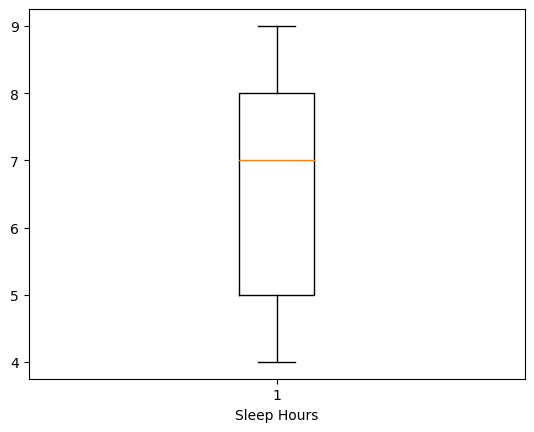

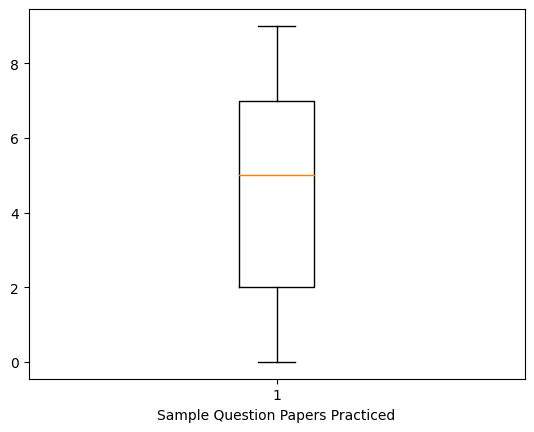

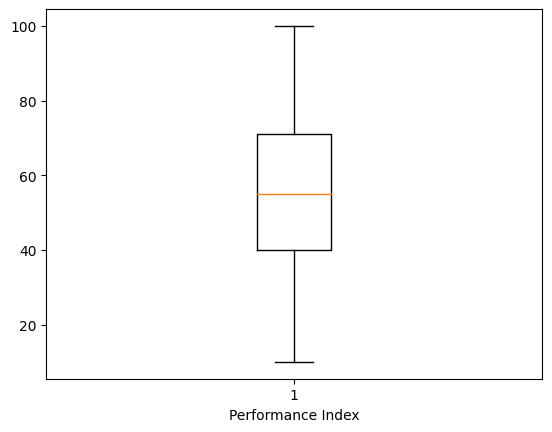

In [35]:
for i in data.columns:
    if data[i].dtypes!='object':
        plt.boxplot(data[i])
        plt.xlabel(i)
        plt.show()

### Checking for multicollinearity

In [38]:
# VIF:  Variance Inflation Factor, used for feature selection

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
features=[]

for i in data.columns:
    if data[i].dtypes !='object' and i!='Performance Index':
        features.append(i)

features

['Hours Studied',
 'Previous Scores',
 'Sleep Hours',
 'Sample Question Papers Practiced']

In [44]:
X=data[features]
vif_data=pd.DataFrame()
vif_data['Feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,Feature,VIF
0,Hours Studied,4.248789
1,Previous Scores,9.866227
2,Sleep Hours,9.736833
3,Sample Question Papers Practiced,3.340441


##### Note: we not dealing with Multicollinearity, because the values are not more than 10

In [70]:
int=[]
for i in data.columns:
    if data[i].dtypes!='object':
        int.append(i)

In [76]:
data[int].corr()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


In [81]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [79]:
X=data.iloc[:,:-1]
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5
...,...,...,...,...,...
9995,1,49,Yes,4,2
9996,7,64,Yes,8,5
9997,6,83,Yes,8,5
9998,9,97,Yes,7,0


In [85]:
y=data.iloc[:,-1]
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [87]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
X['Extracurricular Activities']=le.fit_transform(X['Extracurricular Activities'])

In [91]:
X.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5




### 1. `fit()`
- The `fit()` method **analyzes the data** and **learns the unique categories or classes** in a given feature (for example, all the unique extracurricular activities).
- It stores this mapping internally but does **not actually transform** the data yet.
  
Example:
```python
le.fit(X['Extracurricular Activities'])
```
This only learns the mapping of each category to a unique integer but doesn't return or change the data in any way.

### 2. `fit_transform()`
- The `fit_transform()` method **combines both the `fit()` and `transform()` steps in one line**.
- It first learns the mapping (like `fit()`), then **immediately applies the transformation**, converting the categories into numeric values in a single step.

Example:
```python
X['Extracurricular Activities'] = le.fit_transform(X['Extracurricular Activities'])
```
This will analyze the unique values in the column, map each category to a unique integer, and then replace the original categorical values with these numeric codes.

### Summary of Differences:
- **`fit()`**: Learns the unique categories and maps them but doesn’t transform the data.
- **`fit_transform()`**: Learns the categories and immediately transforms the data in a single step.

Using `fit_transform()` is convenient when you want to both learn and apply the transformation to the data in one go.

## Building the Model

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [105]:
X_train.shape

(8000, 5)

In [107]:
X_test.shape

(2000, 5)

In [111]:
# Model initialization
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [113]:
y_pred=lr.predict(X_test)
y_pred

array([41.47902964, 26.80356121, 34.25396502, ..., 46.55583459,
       67.91222593, 59.16766817])

In [115]:
perf=pd.DataFrame()
perf['Actual']=y_test
perf['Predicted']=y_pred
perf

,Actual,Predicted
937,38.0,41.479030
9355,27.0,26.803561
2293,30.0,34.253965
192,49.0,48.256838
8675,39.0,39.568253
...,...,...
5624,78.0,76.847251
6005,40.0,42.874026
987,48.0,46.555835
6152,64.0,67.912226


In [117]:
from sklearn.metrics import *

In [119]:
r2_score(y_test,y_pred)

0.9886543202866286